In [12]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [13]:
df=pd.read_csv('../data/diamonds_hw.csv')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53815 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [15]:
df.describe()

,carat,depth,table,price,x,y,z
count,53815.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797891,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474043,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Kolom-kolom dari dataset 'diamonds.csv' memiliki definisi sebagai berikut:

- price: price in US dollars ( 326−− 18,823)
- carat: weight of the diamond (0.2--5.01)
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour, from J (worst) to D (best)
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x: length in mm
- y: width in mm
- z: depth in mm
- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y)
- table: width of top of diamond relative to widest point

In [16]:
#missing value on carat table
(53940-53815)*100/53940


0.2317389692250649

Text(0.5, 1.0, 'Ditribution of Carat')

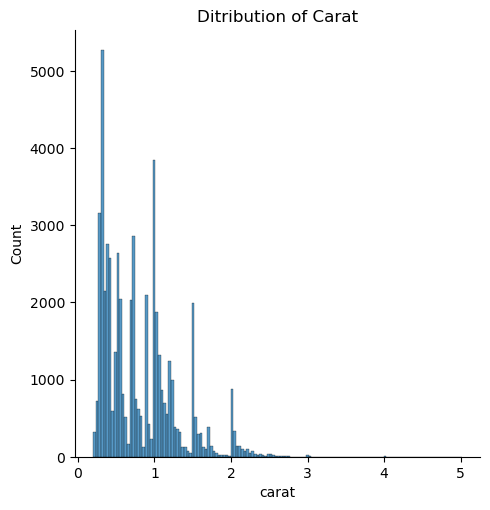

In [17]:
sns.displot(df['carat'])
plt.title('Ditribution of Carat')

In [18]:
df['carat']=df['carat'].fillna(df['carat'].median())
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [19]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [20]:
#change clarity from categorical to numeric
change_clarity={
    'I1':1,
    'SI2':2, 
    'SI1':3,
    'VS2':4, 
    'VS1':5, 
    'VVS2':6, 
    'VVS1':7, 
    'IF':8
}
df['clarity']=df['clarity'].map(change_clarity)
df 

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,3,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,3,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,3,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,2,61.0,58.0,2757,6.15,6.12,3.74


Text(0.5, 1.0, 'boxplot z')

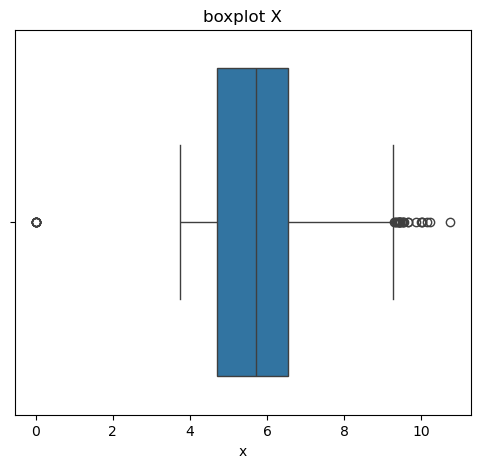

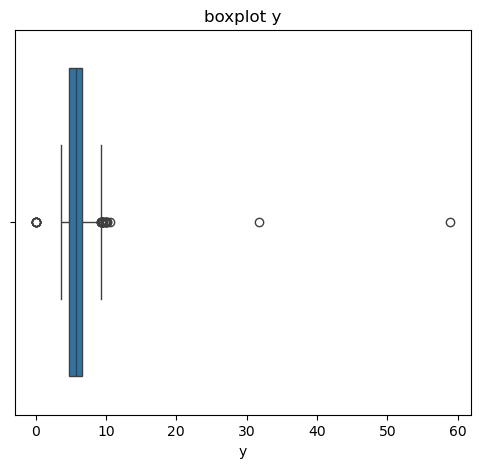

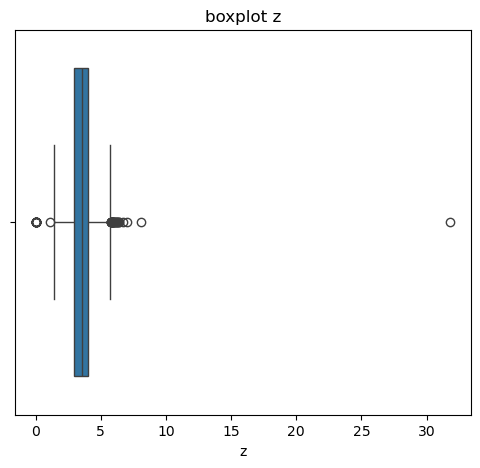

In [21]:
#outlier identification 

# X boxplot
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x=df['x'])
plt.title('boxplot X')

# y boxplot
plt.figure(figsize=(20,5))
plt.subplot(1,3,2)
sns.boxplot(x=df['y'])
plt.title('boxplot y')

# z boxplot
plt.figure(figsize=(20,5))
plt.subplot(1,3,3)
sns.boxplot(x=df['z'])
plt.title('boxplot z')

In [22]:
outlier={}
for column in ['x','y','z']:
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    q2=q3-q1
    batas_bawah=q1-1.5*q2
    batas_atas=q3+1.5*q2
    outlier[column]=df[(df[column]<batas_bawah)|(df[column]>batas_atas)]
#See outlier in x,y,z column
all_outlier=pd.concat([outlier['x'],outlier['y'],outlier['z']])
all_outlier


,carat,cut,color,clarity,depth,table,price,x,y,z
11182,1.07,Ideal,F,2,61.6,56.0,4954,0.00,6.62,0.00
11963,1.00,Very Good,H,4,63.3,53.0,5139,0.00,0.00,0.00
15951,1.14,Fair,G,5,57.5,67.0,6381,0.00,0.00,0.00
22741,3.01,Fair,H,1,56.1,62.0,10761,9.54,9.38,5.31
22831,3.00,Good,I,1,57.0,64.0,10863,9.38,9.31,5.33
...,...,...,...,...,...,...,...,...,...,...
27739,2.80,Good,G,2,63.8,58.0,18788,8.90,8.85,0.00
48410,0.51,Very Good,E,5,61.8,54.7,1970,5.12,5.15,31.80
49556,0.71,Good,F,2,64.1,60.0,2130,0.00,0.00,0.00
49557,0.71,Good,F,2,64.1,60.0,2130,0.00,0.00,0.00
